In [14]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import constants

$\frac{d^{2}\theta}{dt^{2}} = -\frac{g}{l}sin(\theta)$

In [95]:
def RK_4M(t1, x0,k,l, h):
    """ODE Solver for ODEs of the form dx/dt = (k/l)*x using Runge-Kutta 4th order Method. 
    Assumes that the initial condition is given at t = 0 
       
    Args: 
        t1: time to solve the equation up to
        x0: starting value of x, at t = 0
        k:  value of k in the ODE equation
        h:  step size of the method 
        
    Returns:
        t: An array in increments of h for the dimension of time up to t1
        x: An array for the position coordinate at each timepoint
    """
    
    #Initialise the arrays to be used
    # t is an array containing each of the timepoints that we will step forward to
    t = np.arange(0,t1+h,h)
    # n is the number of timesteps in t
    n = np.shape(t)[0]
    # x starts as an empty array, but we will fill in the values we calculate in the loop, below
    x = np.zeros(n) 
    v = np.zeros(n)
    E = np.zeros(n)
    
    #Set the initial value of x (i.e. x[0])
    x[0] = x0
    v[0]= 0
    E[0]=  0.5 * k * x[0]**2 + 0.5 * l * v[0]**2
    
    #Loop over the time values and calculate the derivative
    for i in range(1,n): 

        #position
        #k1 value
        k1=h*v[i-1]
        #x midpoint
        x_m = (v[i-1] + (1/2)*k1)
        #k2 value
        k2=h*(x_m)
        #k3 value
        k3=(h*v[i-1] + (h/2)*k2) 
        #k4 value
        k4=(h*v[i-1] + (h)*k3)
        
        #x value
        x[i] = x[i-1] + (1/6)*k1 + (1/3)* k2 + (1/3) * k3 + (1/6) * k4 

        #velocity
        #k1 value
        k1=h*(-k/l)*np.sin(x[i-1])
        #x midpoint
        x_m = ((-k/l)*np.sin(x[i-1]) + (1/2)*k1)
        #k2 value
        k2=h*(x_m)
        #k3 value
        k3=(h*(-k/l)*np.sin(x[i-1]) + (h/2)*k2) 
        #k4 value
        k4=(h*(-k/l)*np.sin(x[i-1]) + (h)*k3)
        
        #v value
        v[i] = v[i-1] + (1/6)*k1 + (1/3)* k2 + (1/3) * k3 + (1/6) * k4 

         # Calculate energy at this step
        E[i] = 0.5 * k * np.sin(x[i-1])**2 + 0.5 * l * v[i-1]**2
    
    
    return(t,x,v,E) 

In [96]:
t,x,v,E=RK_4M(20,0.0003,sp.constants.g,1,.001)

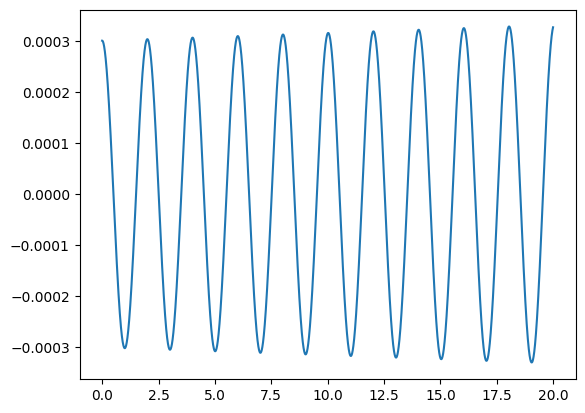

In [97]:
plt.plot(t,x)
plt.show()

In [98]:
x[-1]

0.00032619545397677045

In [99]:
v0=np.sqrt((0.5 * sp.constants.g * (x[-1])**2 )/( 0.5 * 1))
v0

0.0010214996966301502